In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import time

In [2]:
data = pd.read_csv(r"C:\Users\akgh1\Desktop\AI_project\Flight_Price_Dataset_Q2.csv")
data.tail(10)

,departure_time,stops,arrival_time,class,duration,days_left,price
270128,Evening,one,Night,Business,6.58,49,51345
270129,Morning,one,Night,Business,13.67,49,51345
270130,Evening,one,Morning,Business,16.00,49,51345
270131,Evening,one,Morning,Business,18.92,49,51345
270132,Early_Morning,one,Morning,Business,26.83,49,51345
270133,Early_Morning,one,Night,Business,17.25,49,68739
270134,Morning,one,Evening,Business,10.08,49,69265
270135,Afternoon,one,Night,Business,10.42,49,77105
270136,Early_Morning,one,Evening,Business,10.00,49,81585
270137,Morning,one,Evening,Business,10.08,49,81585


In [3]:
data['stops'].value_counts()

stops
one            225767
zero            32466
two_or_more     11905
Name: count, dtype: int64

In [4]:
mapping = {'zero': 3,
           'one' : 2,
           'two_or_more' : 1}

data['stops_num'] = data['stops'].map(mapping)
data['stops_num'].value_counts()

stops_num
2    225767
3     32466
1     11905
Name: count, dtype: int64

In [5]:
label_encoder = LabelEncoder()

data['arrival_time_num'] = label_encoder.fit_transform(data['arrival_time'])
data['class_num'] = label_encoder.fit_transform(data['class'])
data['departure_time_num'] = label_encoder.fit_transform(data['departure_time'])
print(data['arrival_time_num'].value_counts())
print(data['class_num'].value_counts())
print(data['departure_time_num'].value_counts())

arrival_time_num
5    82413
2    70494
4    56438
0    34274
1    13889
3    12630
Name: count, dtype: int64
class_num
1    185998
0     84140
Name: count, dtype: int64
departure_time_num
4    64036
1    60112
2    58586
5    43267
0    42951
3     1186
Name: count, dtype: int64


In [6]:
data

,departure_time,stops,arrival_time,class,duration,days_left,price,stops_num,arrival_time_num,class_num,departure_time_num
0,Evening,zero,Night,Economy,2.17,1,5953,3,5,1,2
1,Early_Morning,zero,Morning,Economy,2.33,1,5953,3,4,1,1
2,Early_Morning,zero,Early_Morning,Economy,2.17,1,5956,3,1,1,1
3,Morning,zero,Afternoon,Economy,2.25,1,5955,3,0,1,4
4,Morning,zero,Morning,Economy,2.33,1,5955,3,4,1,4
...,...,...,...,...,...,...,...,...,...,...,...
270133,Early_Morning,one,Night,Business,17.25,49,68739,2,5,0,1
270134,Morning,one,Evening,Business,10.08,49,69265,2,2,0,4
270135,Afternoon,one,Night,Business,10.42,49,77105,2,5,0,0
270136,Early_Morning,one,Evening,Business,10.00,49,81585,2,2,0,1


In [7]:
X = data[['departure_time_num', 'stops_num', 'arrival_time_num', 'class_num', 'duration', 'days_left']]
Y = data['price']
X

,departure_time_num,stops_num,arrival_time_num,class_num,duration,days_left
0,2,3,5,1,2.17,1
1,1,3,4,1,2.33,1
2,1,3,1,1,2.17,1
3,4,3,0,1,2.25,1
4,4,3,4,1,2.33,1
...,...,...,...,...,...,...
270133,1,2,5,0,17.25,49
270134,4,2,2,0,10.08,49
270135,0,2,5,0,10.42,49
270136,1,2,2,0,10.00,49


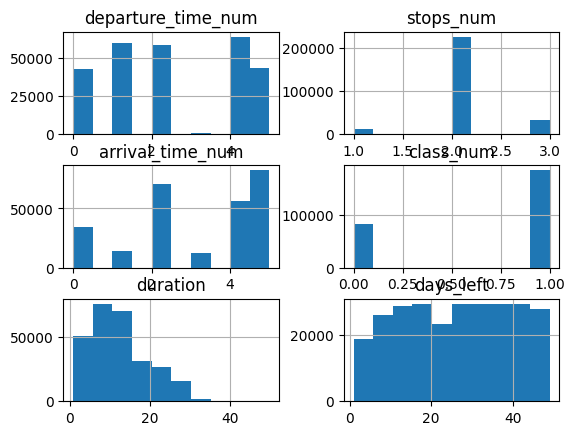

In [8]:
viz = X[['departure_time_num', 'stops_num', 'arrival_time_num', 'class_num', 'duration', 'days_left']]
viz.hist()
plt.show()

In [9]:
X = (X - X.mean()) / X.std()
X['Ones'] = 1
X = X.to_numpy()
Y = Y.to_numpy()
X[1]

array([-0.80857906,  2.32091044,  0.53140093,  0.67258366, -1.37499463,
       -1.84374895,  1.        ])

In [10]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
len(X_train)/len(X)

0.7999985192753334

In [32]:
class Regression:
    def __init__(self, learning_rate=0.1, num_iterations=2000, tolerance=1e-6):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.coefficients = None
        self.coefficients = None
        self.cost_history = []
        self.tolerance = tolerance

    def fit(self, X, Y):

        self.coefficients = np.zeros(X.shape[1])

        for iteration  in range(self.num_iterations):

            predictions = np.dot(X, self.coefficients)

            errors = predictions - Y

            gradient = np.dot(X.T, errors) / len(Y)
            self.coefficients -= self.learning_rate * gradient

            rmse = np.sqrt(np.mean((predictions - Y) ** 2))
            self.cost_history.append(rmse)


            if iteration > 0 and abs(self.cost_history[iteration - 1] - rmse) < 1e-3 and self.learning_rate > 0.01:
                self.learning_rate = self.learning_rate / 10 
                print(abs(self.cost_history[iteration - 1] -rmse))
                print('learning_rate *= 0.1 ' ,self.learning_rate )
                
            if iteration > 0 and abs(self.cost_history[iteration - 1] - rmse) < self.tolerance:
                print(abs(self.cost_history[iteration - 1] - rmse))
                self.num_iterations = iteration + 1
                print(f"Converged after {iteration} iterations.")
                break

    def predict(self, X):
        if self.coefficients is None:
            raise ValueError("Model has not been fitted. Call fit() first.")
        return np.dot(X, self.coefficients)

In [33]:
model = Regression()
start_time = time.time()
model.fit(X_train, Y_train)
end_time = time.time()
print("Final Coefficients:",model.coefficients)
training_time = end_time - start_time
print(f"Training Time: {training_time} seconds")

0.0009711786433399539
learning_rate *= 0.1  0.01
9.924424375640228e-07
Converged after 554 iterations.
Final Coefficients: [   259.20705793  -2475.05378914    355.64736336 -21170.20731237
    446.10646653  -1775.39922637  20893.20570028]
Training Time: 6.401550531387329 seconds


In [34]:
test_y_ = model.predict(X_test)
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
print(r2_score(Y_test, test_y_))
print(mean_squared_error(Y_test, test_y_))

0.9014257855640618
50877757.05311071


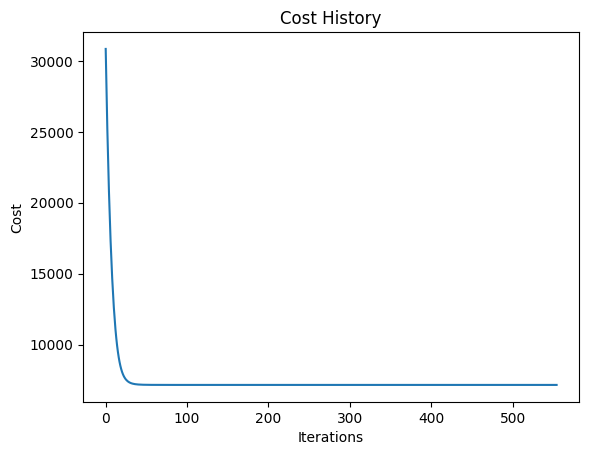

In [35]:
plt.plot(range(model.num_iterations), model.cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost History")
plt.show()